In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/yelp-reviews-csv"))

# Any results you write to the current directory are saved as output.

['yelp_review.csv']


In [2]:
review_set = pd.read_csv("../input/yelp-reviews-csv/yelp_review.csv")

In [3]:
review_set.set_index(pd.to_datetime(review_set['date']),inplace=True)

In [4]:
review_set.drop(['review_id','user_id','business_id','date'],axis=1,inplace=True)

In [5]:
review_set.sort_index(inplace=True)

In [6]:
daily_mean=review_set.groupby(review_set.index)['stars'].rolling(365).mean()

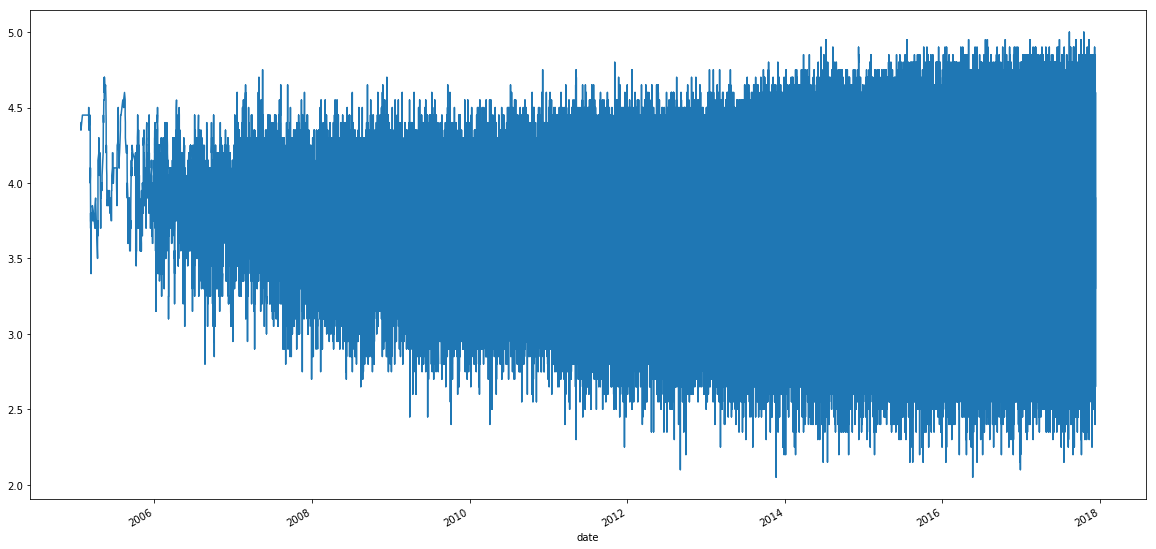

In [7]:
review_set['stars'].rolling(20).mean().plot(figsize=(20,10))

In [30]:
slow_df=pd.DataFrame(columns=['stars','text','useful','funny','cool'])

In [31]:
slow_df=review_set[review_set['text'].str.contains("slow")]
fast_df=review_set[review_set['text'].str.contains("fast")]

In [32]:
slow_daily_mean = slow_df.groupby(slow_df.index)['stars'].rolling(20).mean()
fast_daily_mean = fast_df.groupby(fast_df.index)['stars'].rolling(20).mean()

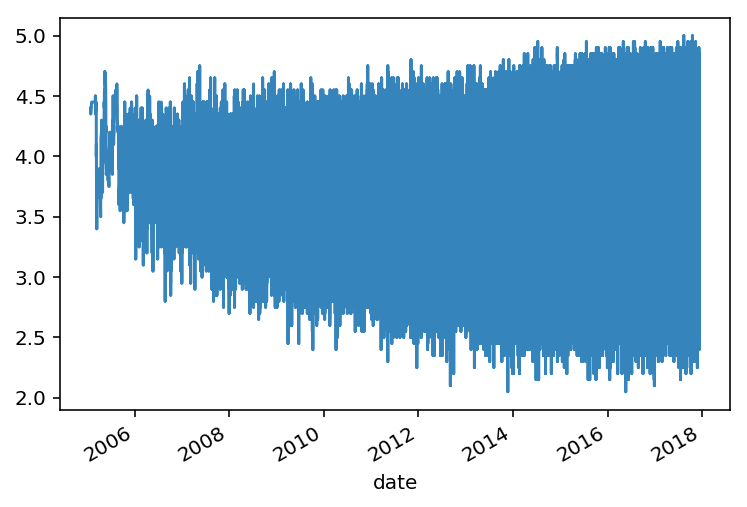

In [33]:
review_set['stars'].rolling(20).mean().plot(alpha=0.9)
%config InlineBackend.figure_format = 'retina'

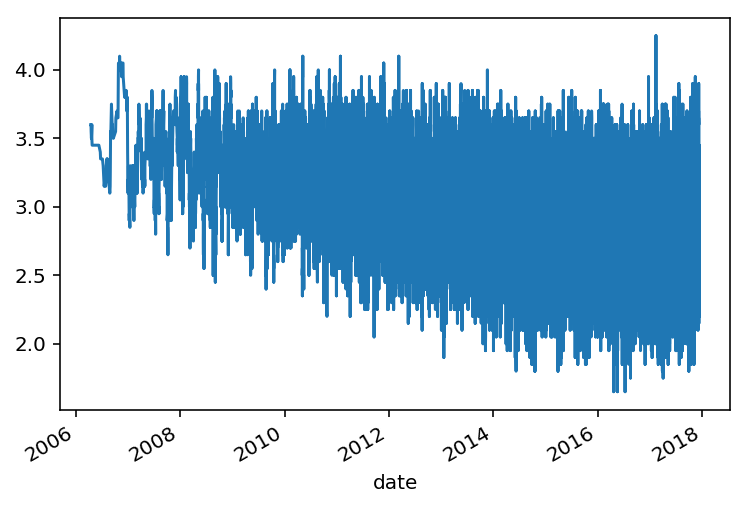

In [34]:
slow_df['stars'].rolling(20).mean().plot()
%config InlineBackend.figure_format = 'retina'

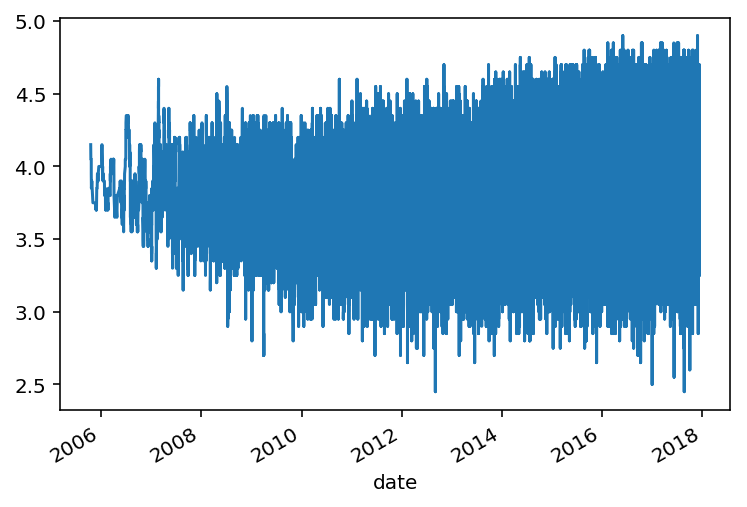

In [35]:
fast_df['stars'].rolling(20).mean().plot()
%config InlineBackend.figure_format = 'retina'

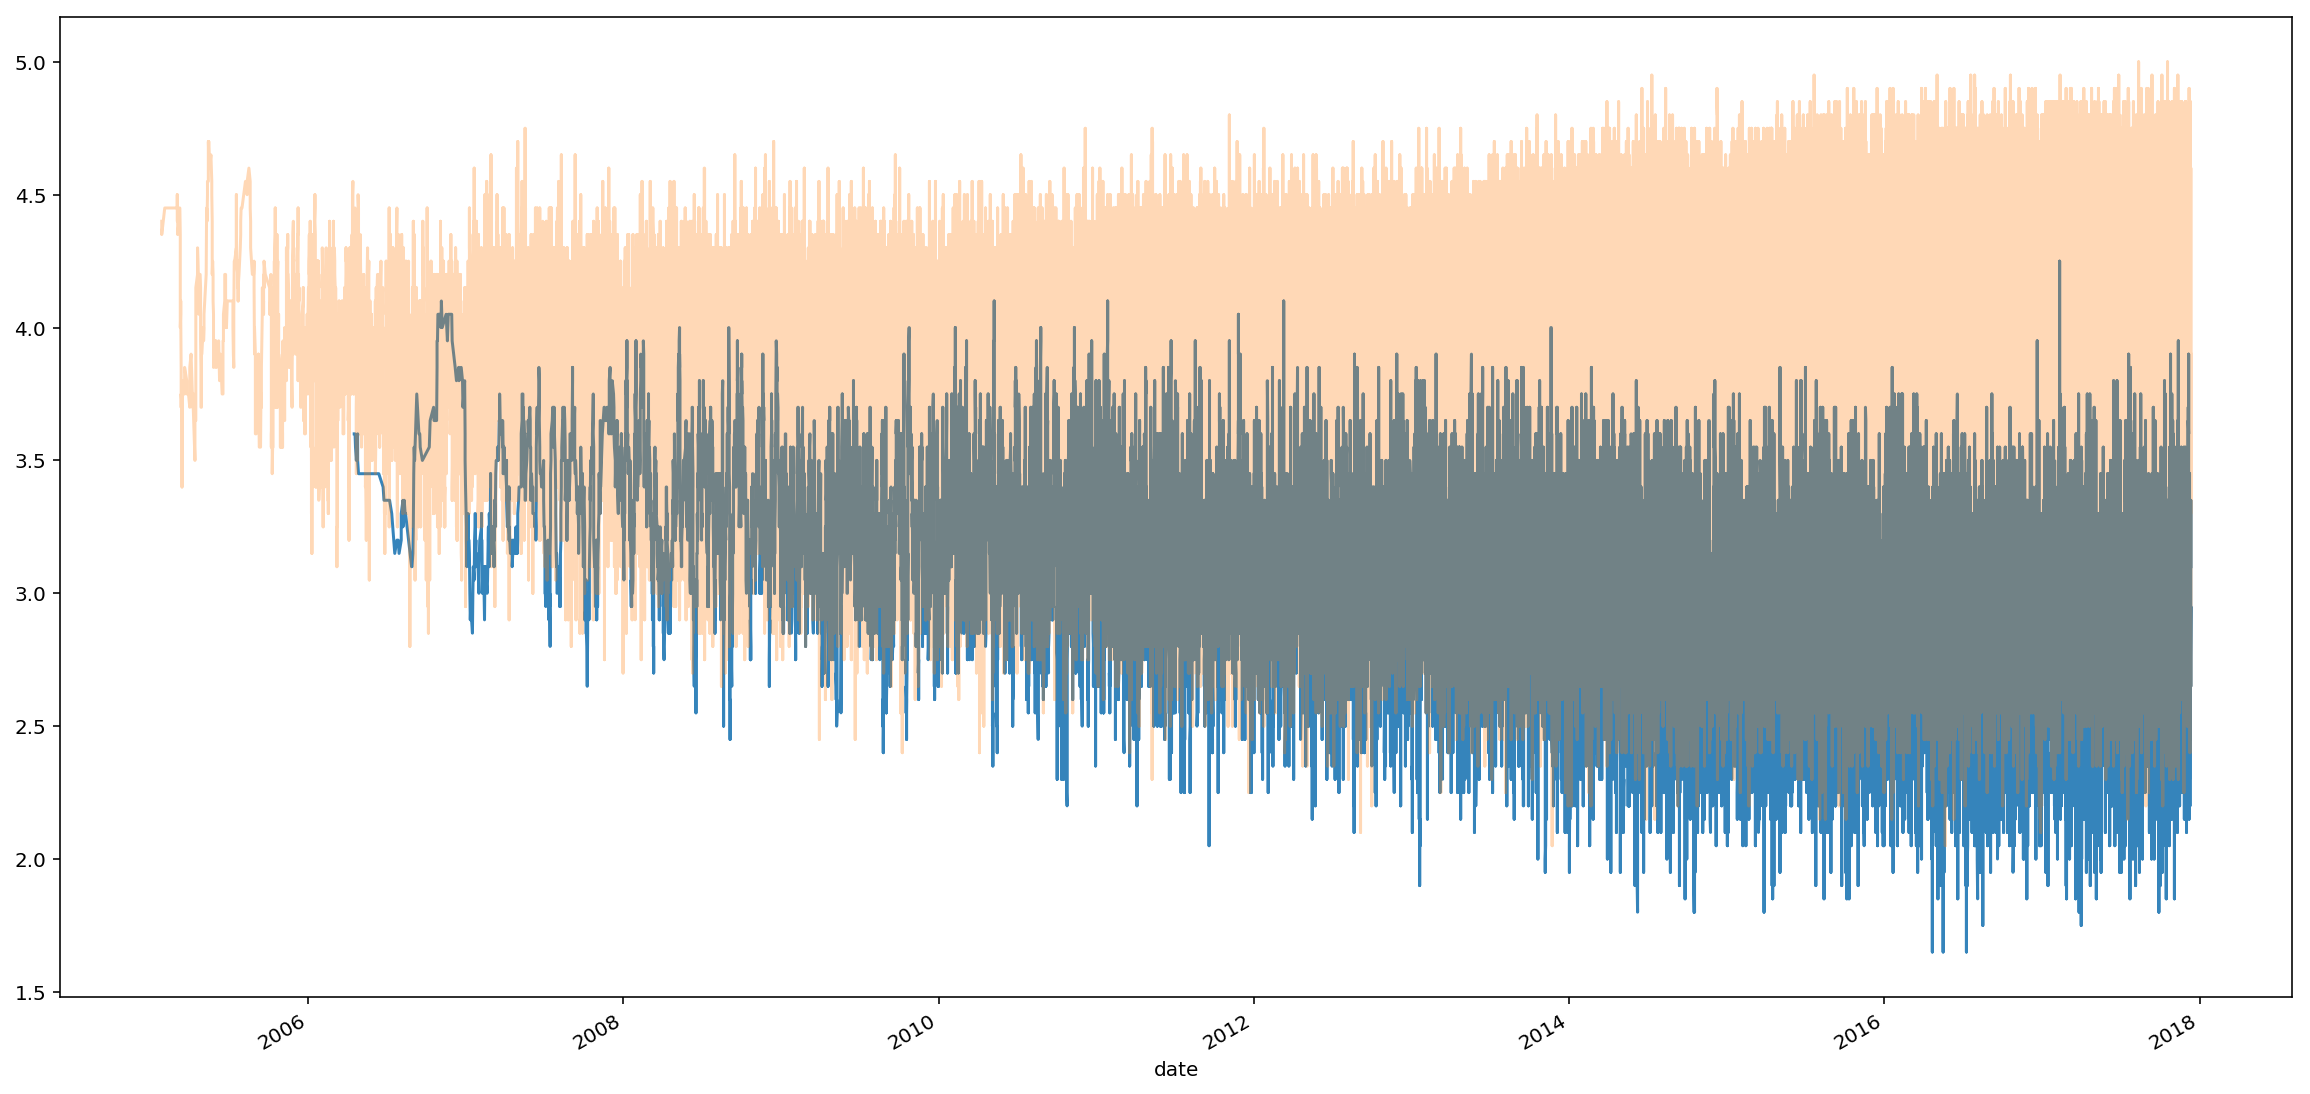

In [36]:
slow_df['stars'].rolling(20).mean().plot(alpha=0.9,figsize=(20,10))
review_set['stars'].rolling(20).mean().plot(alpha=0.3)
%config InlineBackend.figure_format = 'retina'

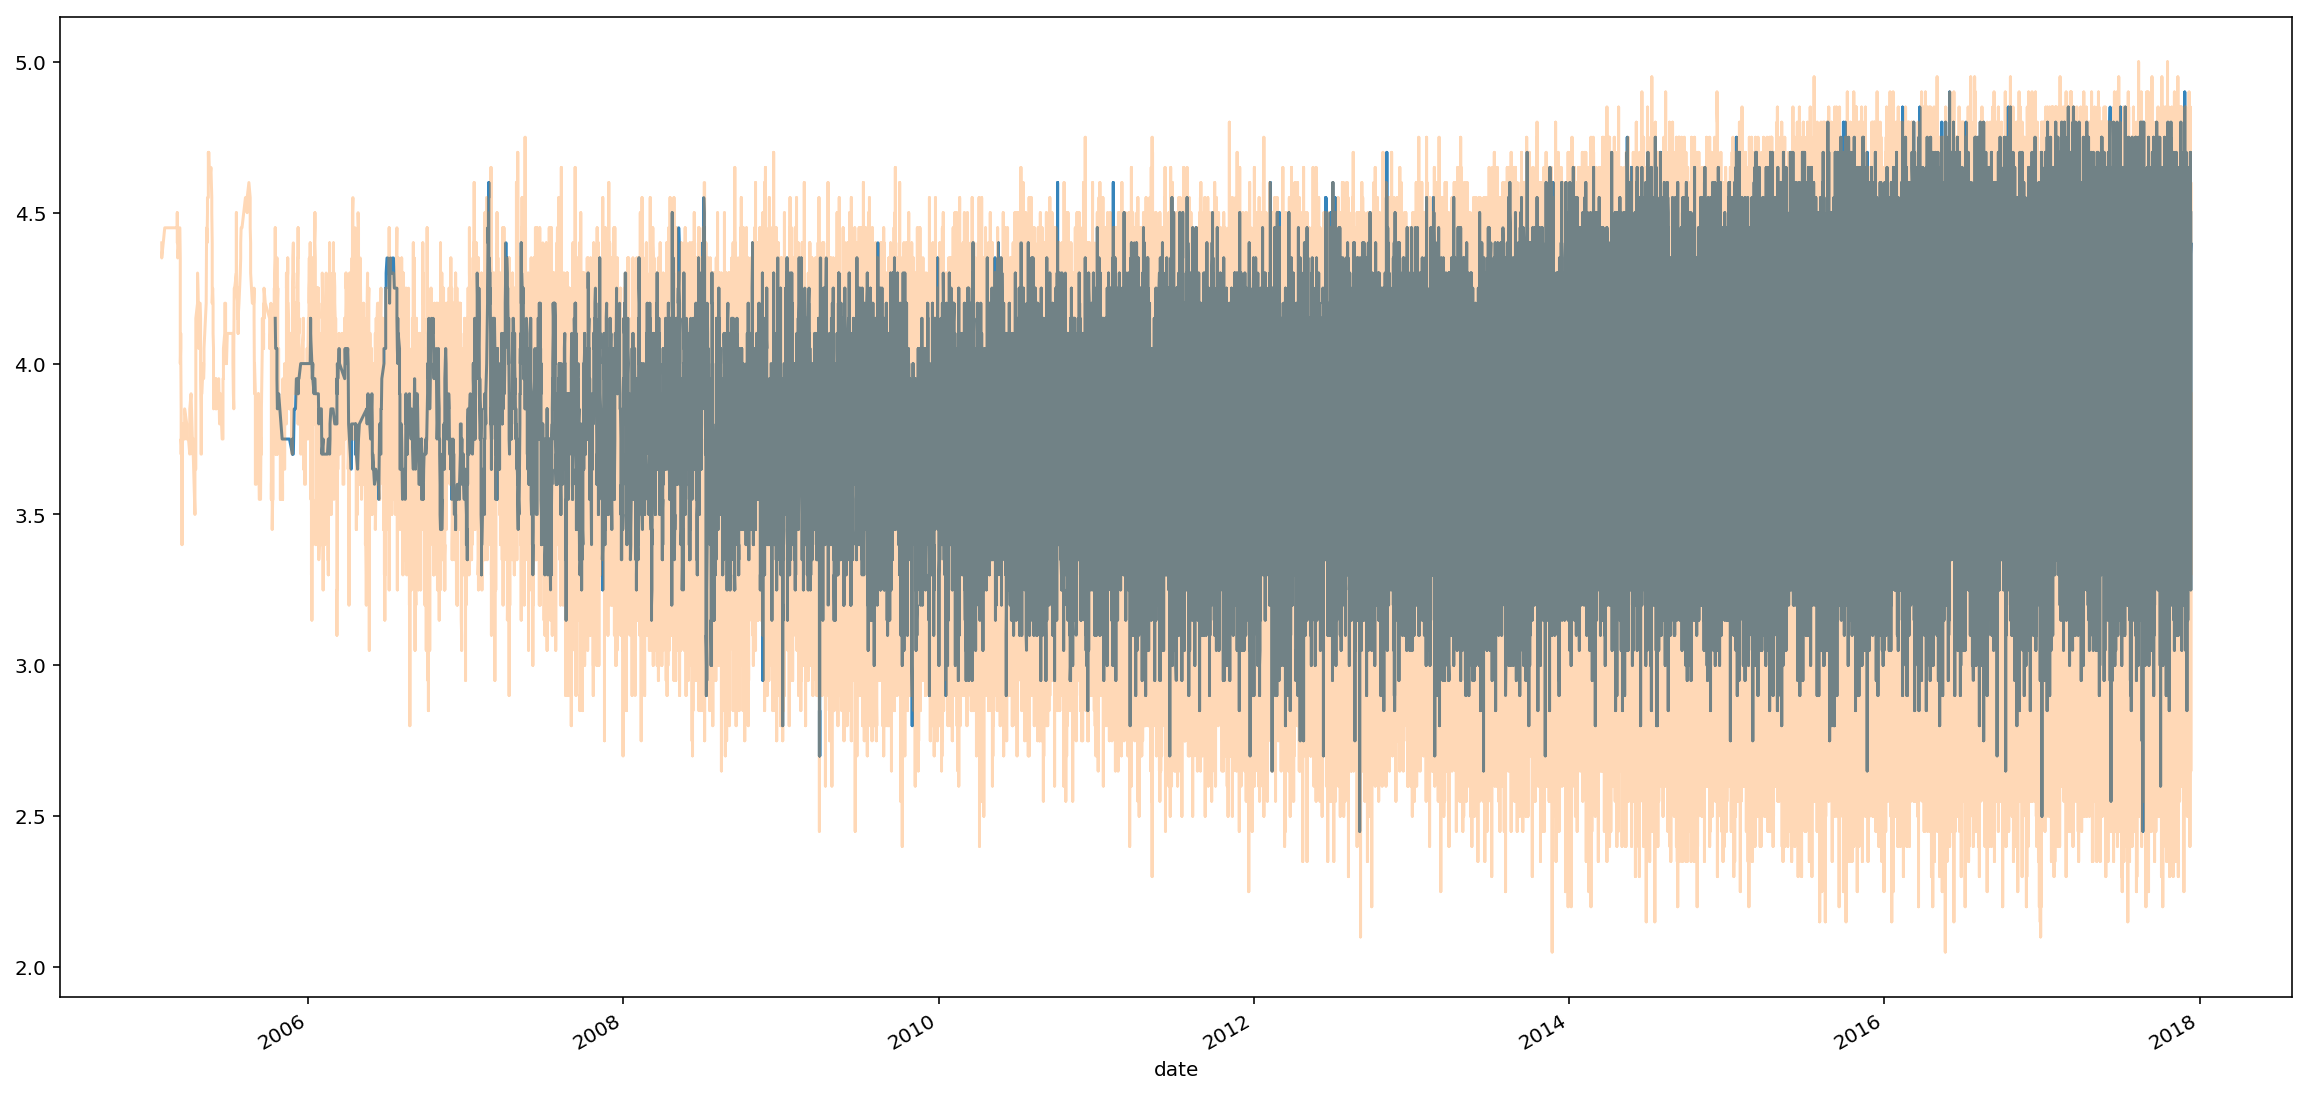

In [52]:
fast_df['stars'].rolling(20).mean().plot(alpha=0.9,figsize=(20,10))
review_set['stars'].rolling(20).mean().plot(alpha=0.3)
%config InlineBackend.figure_format = 'retina'

In [37]:
review_set['stars'].describe()

count    5.261668e+06
mean     3.727739e+00
std      1.433593e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [38]:
slow_df['stars'].describe()

count    132170.000000
mean          2.921813
std           1.330427
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: stars, dtype: float64

In [39]:
from scipy import stats

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


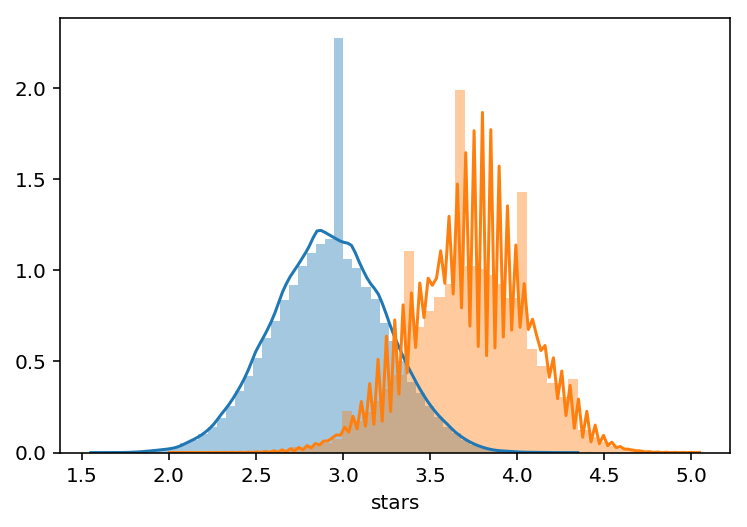

In [40]:
sns.distplot(slow_df['stars'].rolling(20).mean().dropna())
sns.distplot(review_set['stars'].rolling(20).mean().dropna())
%config InlineBackend.figure_format = 'retina'

In [41]:
import statsmodels.api as sm
df = slow_df.reset_index()

In [42]:
type(df['date'])

pandas.core.series.Series

In [43]:
df.head()

,date,stars,text,useful,funny,cool
0,2005-03-12,5,the best breakfast you will ever eat. she get...,0,1,0
1,2005-09-16,5,Simply mah-vo-lis. Divine sandwiches and deli ...,0,0,0
2,2005-09-19,4,The decor is an odd mix of Arizona ranch and C...,3,0,3
3,2005-10-09,2,"The tricky thing about King Tut's is that, whi...",2,1,1
4,2005-10-18,3,"Most dishes are Indian, but they serve food I ...",2,0,0


In [44]:
import matplotlib.dates as mdates

In [45]:
import statsmodels.api as sm

In [46]:
slow_df['Date'] = slow_df.index.map(mdates.date2num)
slow_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,stars,text,useful,funny,cool,Date
date,,,,,,
2005-03-12,5,the best breakfast you will ever eat. she get...,0,1,0,732017.0
2005-09-16,5,Simply mah-vo-lis. Divine sandwiches and deli ...,0,0,0,732205.0
2005-09-19,4,The decor is an odd mix of Arizona ranch and C...,3,0,3,732208.0
2005-10-09,2,"The tricky thing about King Tut's is that, whi...",2,1,1,732228.0
2005-10-18,3,"Most dishes are Indian, but they serve food I ...",2,0,0,732237.0


In [47]:
slow_df['rolling']=slow_df['stars'].rolling(20).mean()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
slow_df.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


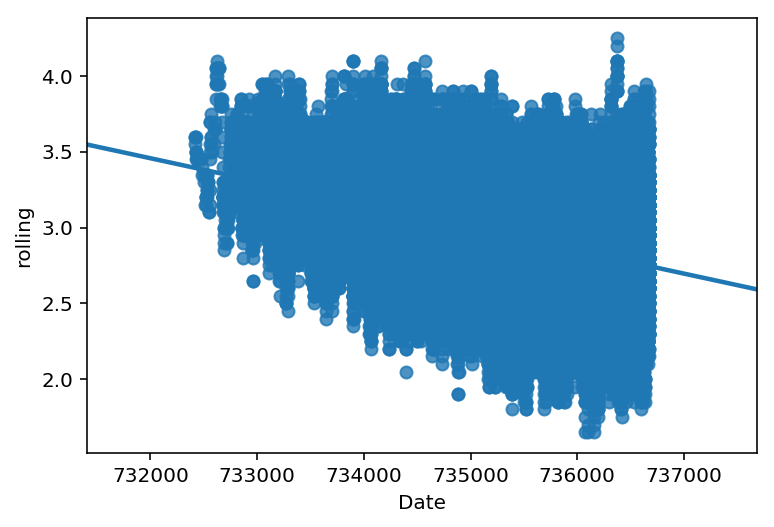

In [49]:
sns.regplot(x='Date', y='rolling', data=slow_df)

In [50]:
model=sm.OLS(endog=slow_df['Date'],exog=slow_df['rolling'])
results = model.fit()

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Date   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.054e+07
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        04:28:11   Log-Likelihood:            -1.6825e+06
No. Observations:              132151   AIC:                         3.365e+06
Df Residuals:                  132150   BIC:                         3.365e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rolling     2.486e+05     76.587   3246.424      0.000    2.48e+05    2.49e+05
==============================================================================
Omnibus:                       69.257   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.182
Skew:                          -0.002   Prob(JB):                     3.14e-14
Kurtosis:                       2.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""